In [1]:
import matplotlib.pyplot as plt
import numpy as np
import axoproj as ap

# ____

# Simple disk in Keplerian rotation

## Datacube creation

In [2]:
# Final datacube informations
ra = np.linspace(-300,300,150)
dec = np.linspace(-300,300,150)
vrad = np.arange(-10,11,0.5) 

In [3]:
# Creation of a disk model
disk_model = ap.Disk_model(rin = 0.1, rout = 200, Mstar = 1, epsilon = 0.3)

# Setting up step in radius and angular position
disk_model.create_setup(step = 0.1, dphi = 0.5)

# create datacube with specified P.A and inclination
cube_disk = ap.create_datacube(disk_model, ra, dec, vrad, incl = 60, pa = 0)

Setting up the resolution
Final array size : (3998 , 720 , 1)


  7%|▋         | 207069/2962810 [00:00<00:02, 1035226.28it/s]

                                                              THE DATA IS 118.0 MB                                                             
                                                        TRANSFORMING INTO PPV OF 7.0 MB                                                        


100%|██████████| 2962810/2962810 [00:02<00:00, 1092330.55it/s]


## Imaging the resulting datacube on 3 channel maps.

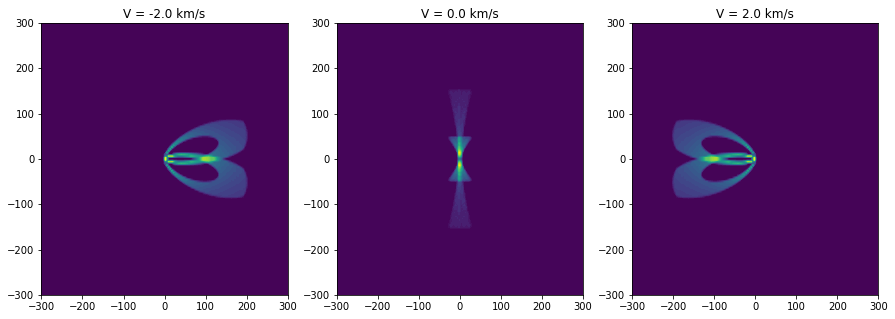

In [4]:
fig = plt.figure(figsize = (15,5))
for i,v_val in enumerate([-2,0,2]):
    plt.subplot(1,3,i+1)
    plt.contourf(ra,dec,cube_disk[:,:,ap.i_near(vrad,v_val)],(50))
    plt.title('V = {:.1f} km/s'.format(v_val))
plt.show()
    

# ____

# Wind Driven Shells (WDS)

In [5]:
# Final datacube informations
ra = np.linspace(-1400,1400,150)
dec = np.linspace(-1400,1400,150)
vrad = np.arange(0,11,0.3) 


# Creation of multiple shells
WDS_model = ap.WDS_model(C = np.array([0.01,0.02,0.04]), tau = np.array([850,500,220]),alpha = 0)

# Setting up maximal height, step in radius and angular position
WDS_model.create_setup(zmax = 2000, step = 1, dphi = 1)

# create datacube with specified P.A and inclination
cube_WDS = ap.create_datacube(WDS_model, ra, dec, vrad, incl = 115, pa = 0)

Setting up the resolution
Final array size : (2000 , 360 , 3)


 13%|█▎        | 205305/1523825 [00:00<00:01, 1026426.87it/s]

                                                              THE DATA IS 60.0 MB                                                              
                                                        TRANSFORMING INTO PPV OF 6.0 MB                                                        


100%|██████████| 1523825/1523825 [00:01<00:00, 1099639.90it/s]


## Imaging the resulting datacube on 3 channel maps.

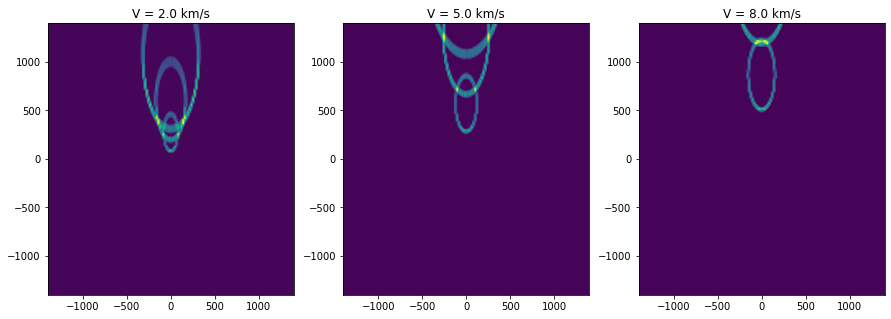

In [6]:
fig = plt.figure(figsize = (15,5))
for i,v_val in enumerate([2,5,8]):
    plt.subplot(1,3,i+1)
    plt.contourf(ra,dec,cube_WDS[:,:,ap.i_near(vrad,v_val)],(50))
    plt.title('V = {:.1f} km/s'.format(v_val))
plt.show()
    

# ____ 

# Disk wind model

In [7]:
# Final datacube informations
ra = np.linspace(-1400,1400,150)
dec = np.linspace(-1400,1400,150)
vrad = np.arange(0,11,0.3) 

# Setting up simple disk wind parameters :

r0_vec = np.linspace(20, 40, 50)
theta_vec = np.linspace(10, 20, 50)
vp_vec = np.linspace(15, 5, 50)
j_vec = np.linspace(20, 100, 50)

# Creation of the disk wind model
disk_wind = ap.DW_model(r0 = r0_vec, theta = theta_vec, vp = vp_vec, J = j_vec, alpha = 0)

# Setting up maximal height, step in radius and angular position
disk_wind.create_setup(zmax = 2000, step = 1, dphi = 1)

# create datacube with specified P.A and inclination
cube_DW = ap.create_datacube(disk_wind, ra, dec, vrad, incl = 115, pa = 0)

Setting up the resolution
Final array size : (2000 , 360 , 50)


  1%|          | 198775/28221104 [00:00<00:28, 993765.77it/s]

                                                             THE DATA IS 1128.0 MB                                                             
                                                        TRANSFORMING INTO PPV OF 6.0 MB                                                        


100%|██████████| 28221104/28221104 [00:24<00:00, 1151566.51it/s]


## Imaging the resulting datacube on 3 channel maps.

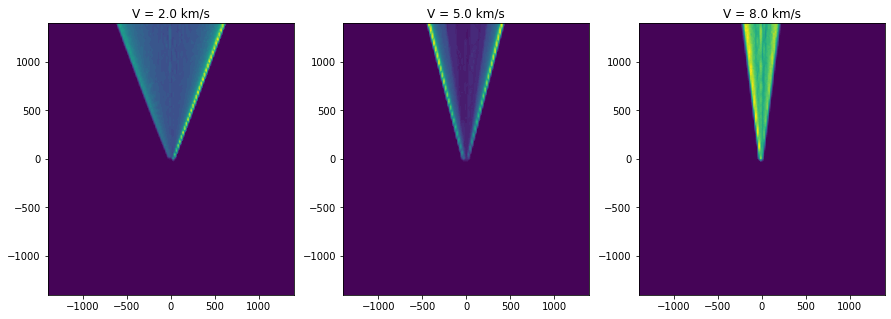

In [8]:
fig = plt.figure(figsize = (15,5))
for i,v_val in enumerate([2,5,8]):
    plt.subplot(1,3,i+1)
    plt.contourf(ra,dec,cube_DW[:,:,ap.i_near(vrad,v_val)],(50))
    plt.title('V = {:.1f} km/s'.format(v_val))
plt.show()
    

# ___

# Infall model

In [9]:
# Final datacube informations
ra = np.linspace(-1400,1400,150)
dec = np.linspace(-1400,1400,150)
vrad = np.arange(-5,11,0.3) 

# Creation of the disk wind model
infall = ap.Infall_model(M = 1,rd =300, theta0 = 60)

# Setting up maximal height, step in radius and angular position
infall.create_setup(zmax = 2000, step = 1, dphi = 1)

# create datacube with specified P.A and inclination
cube_infall = ap.create_datacube(infall, ra, dec, vrad, incl = 115, pa = 0)

Setting up the resolution
Final array size : (2000 , 360 , 1)
2000


 15%|█▍        | 105135/720021 [00:00<00:00, 1051150.51it/s]

                                                              THE DATA IS 28.0 MB                                                              
                                                        TRANSFORMING INTO PPV OF 9.0 MB                                                        


100%|██████████| 720021/720021 [00:00<00:00, 1059412.22it/s]


## Imaging the resulting datacube on 3 channel maps.

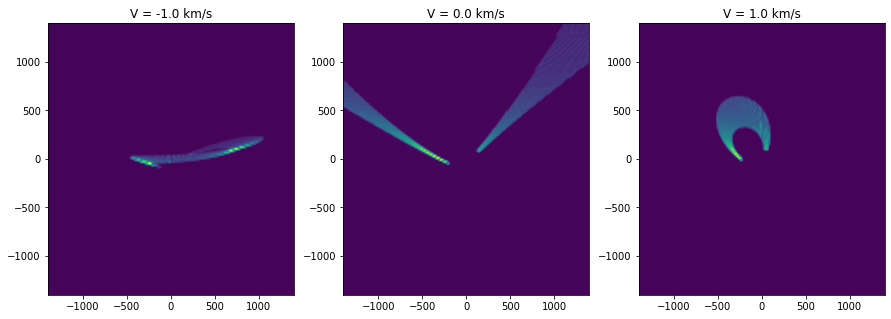

In [10]:
fig = plt.figure(figsize = (15,5))
for i,v_val in enumerate([-1,0,1]):
    plt.subplot(1,3,i+1)
    plt.contourf(ra,dec,cube_infall[:,:,ap.i_near(vrad,v_val)],(50))
    plt.title('V = {:.1f} km/s'.format(v_val))
plt.show()

# ___

# Custom model 
AxOProj can also create synthethic datacube of projected custom models


In [11]:
# Final datacube informations
ra = np.linspace(-1400,1400,150)
dec = np.linspace(-1400,1400,150)
vrad = np.arange(-5,11,0.3) 

# Creation custom model : Here is presented for the exemple a copy of a WDS model

r_model = np.linspace(0,2000,2000)
z_model = r_model * r_model * 0.01
vz_model = z_model * 0.1
vr_model = r_model * 0.1
vphi_model = np.zeros_like(r_model)
i_model = np.ones_like(r_model)


custom = ap.Your_model(r = r_model, z = z_model, vr = vr_model, vz = vz_model, vphi = vphi_model, i = i_model)

# Setting up maximal height, step in radius and angular position
custom.create_setup(dphi = 1)

# create datacube with specified P.A and inclination
cube_custom = ap.create_datacube(custom, ra, dec, vrad, incl = 115, pa = 0)

100%|██████████| 64315/64315 [00:00<00:00, 896338.52it/s]

Setting up the resolution
                                                               THE DATA IS 2.0 MB                                                              
                                                        TRANSFORMING INTO PPV OF 9.0 MB                                                        


## Imaging the resulting datacube on 3 channel maps.

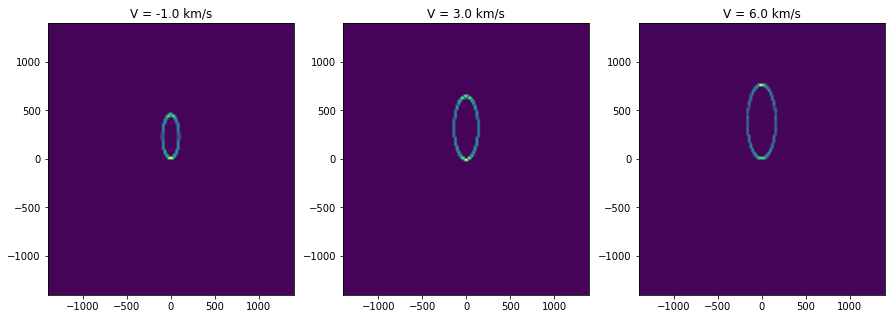

In [12]:
fig = plt.figure(figsize = (15,5))
for i,v_val in enumerate([-1,3,6]):
    plt.subplot(1,3,i+1)
    plt.contourf(ra,dec,cube_custom[:,:,ap.i_near(vrad,v_val)],(50))
    plt.title('V = {:.1f} km/s'.format(v_val))
plt.show()